## multi-modal, multi-label vit and cnn survival model 5-fold-CV result analysis

In [66]:
from lifelines import CoxPHFitter
from lifelines.utils import concordance_index
import lifelines

from lifelines.plotting import add_at_risk_counts
from lifelines.statistics import logrank_test

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

In [67]:
# CNN
data = pd.DataFrame()

for i in range(1,1+5):
    temp = pd.read_csv('Predictions_ViT{}.csv'.format(i))
    data = pd.concat([data, temp], ignore_index=True)
    
data = data.drop([data.columns[0]], axis=1)
data

,ID,OS_risk,OS,Death,LFFS_risk,LFFS,LF,RFFS_risk,RFFS,RF,DFFS_risk,DFFS,DF
0,OPC-00002,5.585012,3472,0,2.678481,3472,0,2.324451,3472,0,2.934763,3472,0
1,OPC-00008,12.743567,192,1,4.750291,39,1,3.898618,192,0,5.619485,189,1
2,OPC-00012,1.793600,3516,0,0.953789,3516,0,0.896477,3516,0,1.132652,3516,0
3,OPC-00016,4.623035,3736,0,1.866553,3736,0,1.716059,3736,0,3.018507,3736,0
4,OPC-00017,2.179234,3911,0,1.212103,3911,0,1.178810,3911,0,1.388081,3911,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,OPC-00590,2.750700,3133,0,1.324161,3133,0,1.275567,3133,0,1.762865,3133,0
508,OPC-00596,1.109411,4339,0,0.576797,4339,0,0.537476,4339,0,0.515381,4339,0
509,OPC-00599,10.414908,2126,0,3.908460,2126,0,2.722989,2126,0,3.723275,2126,0
510,OPC-00602,8.155293,71,1,2.705130,71,0,2.215257,71,0,3.032011,71,0


C-index is 0.7726059570833779


/tmp/ipykernel_1595616/1315214279.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration[duration>3660]=3660
/tmp/ipykernel_1595616/1315214279.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration[duration>3660]=3660


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         166.34 <0.005    124.02

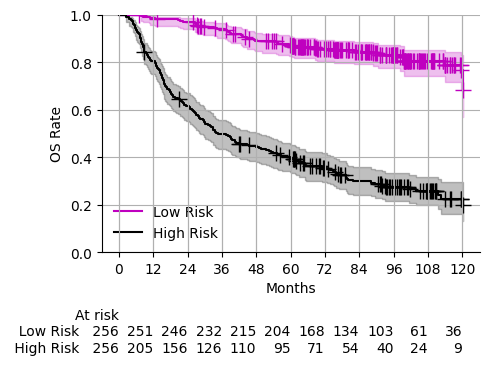

In [68]:
duration = data[['OS']]
duration[duration>3660]=3660
duration /= (365/12)
event = data[['Death']]

score = concordance_index(
                event_times=duration, 
                predicted_scores = -data['OS_risk'], 
                event_observed= event,
            )
print('C-index is', score)

high_risk_ind = np.argwhere(data['OS_risk'].values >= np.median(data['OS_risk']))
low_risk_ind = np.argwhere(data['OS_risk'].values < np.median(data['OS_risk']))

cum_event = event
cum_duration = duration

durations = cum_duration.to_numpy()
events= cum_event.to_numpy()

plt.figure(figsize=(5,4))
ax = plt.subplot(111)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

kmf_1 = lifelines.KaplanMeierFitter()
ax = kmf_1.fit(durations[low_risk_ind], event_observed=events[low_risk_ind], label="Low Risk").plot_survival_function(show_censors=True,ci_show=True, ax=ax,color='m')

kmf_2 = lifelines.KaplanMeierFitter()
ax = kmf_2.fit(durations[high_risk_ind], event_observed=events[high_risk_ind], label="High Risk").plot_survival_function(show_censors=True,ci_show=True, ax=ax,color='k') #, linestyle='dashed'
plt.xticks(np.linspace(0,120,11))
plt.grid()
plt.xlabel('Months')
plt.ylabel('OS Rate')
plt.legend(frameon=False)

add_at_risk_counts(kmf_1, kmf_2, ax=ax, rows_to_show=['At risk'])
plt.tight_layout()
plt.ylim([0, 1])
# plt.savefig('ViT_OS.png', dpi=300)
plt.grid()
results = logrank_test(durations[high_risk_ind], durations[low_risk_ind], events[high_risk_ind], events[low_risk_ind], alpha=.95)

results.print_summary()

/tmp/ipykernel_1595616/603768432.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration1[duration1>3660]=3660
/tmp/ipykernel_1595616/603768432.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration1[duration1>3660]=3660
/tmp/ipykernel_1595616/603768432.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         136.32 <0.005    102.22

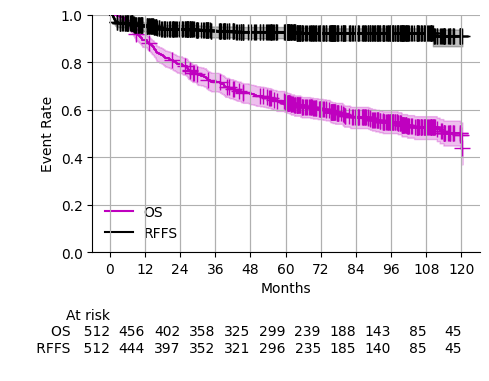

In [69]:
duration1 = data[['OS']]
duration1[duration1>3660]=3660
duration1 /= (365/12)
event1 = data[['Death']].to_numpy()

duration2 = data[['RFFS']]
duration2[duration2>3660]=3660
duration2 /= (365/12)
event2 = data[['RF']].to_numpy()

plt.figure(figsize=(5,4))
ax = plt.subplot(111)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

kmf_1 = lifelines.KaplanMeierFitter()
ax = kmf_1.fit(duration1, event1, label="OS").plot_survival_function(show_censors=True,ci_show=True, ax=ax,color='m')

kmf_2 = lifelines.KaplanMeierFitter()
ax = kmf_2.fit(duration2, event2, label="RFFS").plot_survival_function(show_censors=True,ci_show=True, ax=ax,color='k') #, linestyle='dashed'
plt.xticks(np.linspace(0,120,11))
plt.grid()
plt.xlabel('Months')
plt.ylabel('Event Rate')
plt.legend(frameon=False)

add_at_risk_counts(kmf_1, kmf_2, ax=ax, rows_to_show=['At risk'])
plt.tight_layout()
plt.ylim([0, 1])
# plt.savefig('ViT_OS.png', dpi=300)
plt.grid()
results = logrank_test(duration1, duration2, event1, event2, alpha=.95)

results.print_summary()

/tmp/ipykernel_1595616/614297184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration1[duration1>3660]=3660
/tmp/ipykernel_1595616/614297184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration1[duration1>3660]=3660
/tmp/ipykernel_1595616/614297184.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           6.04 0.01      6.16

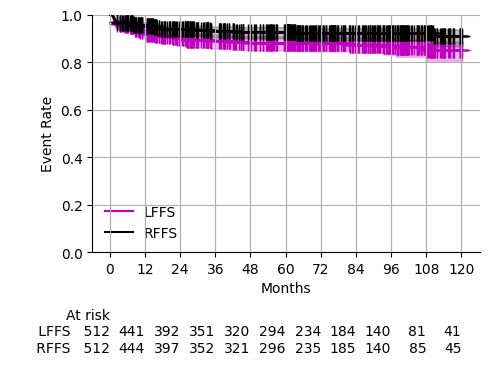

In [70]:
duration1 = data[['LFFS']]
duration1[duration1>3660]=3660
duration1 /= (365/12)
event1 = data[['LF']].to_numpy()

duration2 = data[['RFFS']]
duration2[duration2>3660]=3660
duration2 /= (365/12)
event2 = data[['RF']].to_numpy()

plt.figure(figsize=(5,4))
ax = plt.subplot(111)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

kmf_1 = lifelines.KaplanMeierFitter()
ax = kmf_1.fit(duration1, event1, label="LFFS").plot_survival_function(show_censors=True,ci_show=True, ax=ax,color='m')

kmf_2 = lifelines.KaplanMeierFitter()
ax = kmf_2.fit(duration2, event2, label="RFFS").plot_survival_function(show_censors=True,ci_show=True, ax=ax,color='k') #, linestyle='dashed'
plt.xticks(np.linspace(0,120,11))
plt.grid()
plt.xlabel('Months')
plt.ylabel('Event Rate')
plt.legend(frameon=False)

add_at_risk_counts(kmf_1, kmf_2, ax=ax, rows_to_show=['At risk'])
plt.tight_layout()
plt.ylim([0, 1])
# plt.savefig('ViT_OS.png', dpi=300)
plt.grid()
results = logrank_test(duration1, duration2, event1, event2, alpha=.95)

results.print_summary()

/tmp/ipykernel_1595616/3132574277.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration1[duration1>3660]=3660
/tmp/ipykernel_1595616/3132574277.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration1[duration1>3660]=3660
/tmp/ipykernel_1595616/3132574277.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  durat

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           1.13 0.29      1.80

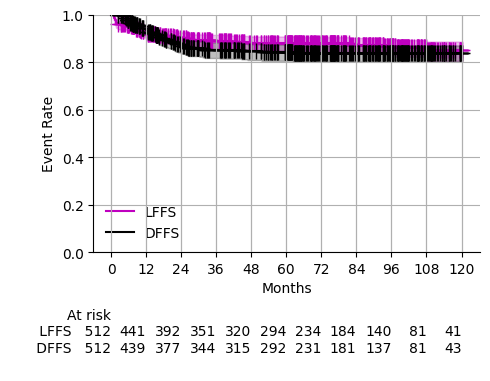

In [71]:
duration1 = data[['LFFS']]
duration1[duration1>3660]=3660
duration1 /= (365/12)
event1 = data[['LF']].to_numpy()

duration2 = data[['DFFS']]
duration2[duration2>3660]=3660
duration2 /= (365/12)
event2 = data[['DF']].to_numpy()

plt.figure(figsize=(5,4))
ax = plt.subplot(111)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

kmf_1 = lifelines.KaplanMeierFitter()
ax = kmf_1.fit(duration1, event1, label="LFFS").plot_survival_function(show_censors=True,ci_show=True, ax=ax,color='m')

kmf_2 = lifelines.KaplanMeierFitter()
ax = kmf_2.fit(duration2, event2, label="DFFS").plot_survival_function(show_censors=True,ci_show=True, ax=ax,color='k') #, linestyle='dashed'
plt.xticks(np.linspace(0,120,11))
plt.grid()
plt.xlabel('Months')
plt.ylabel('Event Rate')
plt.legend(frameon=False)

add_at_risk_counts(kmf_1, kmf_2, ax=ax, rows_to_show=['At risk'], )
plt.tight_layout()
plt.ylim([0, 1])
# plt.savefig('ViT_OS.png', dpi=300)
plt.grid()
results = logrank_test(duration1, duration2, event1, event2, alpha=.95)

results.print_summary()

/tmp/ipykernel_1595616/495604019.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration1[duration1>3660]=3660
/tmp/ipykernel_1595616/495604019.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration1[duration1>3660]=3660
/tmp/ipykernel_1595616/495604019.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          12.19 <0.005     11.02

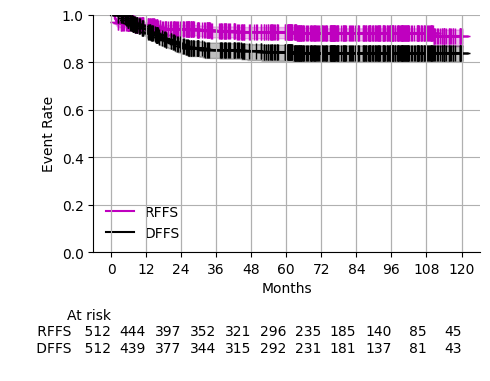

In [72]:
duration1 = data[['RFFS']]
duration1[duration1>3660]=3660
duration1 /= (365/12)
event1 = data[['RF']].to_numpy()

duration2 = data[['DFFS']]
duration2[duration2>3660]=3660
duration2 /= (365/12)
event2 = data[['DF']].to_numpy()

plt.figure(figsize=(5,4))
ax = plt.subplot(111)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

kmf_1 = lifelines.KaplanMeierFitter()
ax = kmf_1.fit(duration1, event1, label="RFFS").plot_survival_function(show_censors=True,ci_show=True, ax=ax,color='m')

kmf_2 = lifelines.KaplanMeierFitter()
ax = kmf_2.fit(duration2, event2, label="DFFS").plot_survival_function(show_censors=True,ci_show=True, ax=ax,color='k') #, linestyle='dashed'
plt.xticks(np.linspace(0,120,11))
plt.grid()
plt.xlabel('Months')
plt.ylabel('Event Rate')
plt.legend(frameon=False)

add_at_risk_counts(kmf_1, kmf_2, ax=ax, rows_to_show=['At risk'])
plt.tight_layout()
plt.ylim([0, 1])
# plt.savefig('ViT_OS.png', dpi=300)
plt.grid()
results = logrank_test(duration1, duration2, event1, event2, alpha=.95)

results.print_summary()

In [73]:
for outcome1 in ["Death", "LF", "RF", "DF"]:
    for outcome2 in ["Death", "LF", "RF", "DF"]:
        print(sum((data[outcome1].to_numpy())*(data[outcome2].to_numpy())), sum(((1-data[outcome1]).to_numpy())*((1-data[outcome2]).to_numpy())))

230 282
55 276
32 277
67 276
55 276
61 451
20 434
11 389
32 277
20 434
37 475
11 413
67 276
11 389
11 413
73 439


In [74]:
sum((data["Death"].to_numpy())*(data["LF"].to_numpy()))

55

In [75]:
sum((data["Death"].to_numpy()))

230

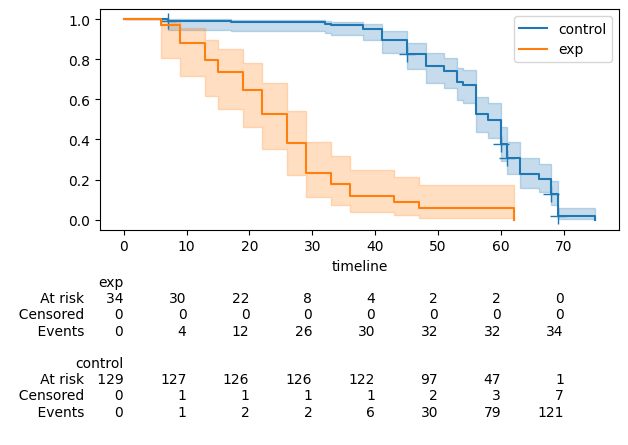

In [76]:
#demo

from lifelines import KaplanMeierFitter
from lifelines.datasets import load_waltons

waltons = load_waltons()
ix = waltons['group'] == 'control'

ax = plt.subplot(111)

kmf_control = KaplanMeierFitter()
ax = kmf_control.fit(waltons.loc[ix]['T'], waltons.loc[ix]['E'], label='control').plot_survival_function(show_censors=True,ci_show=True, ax=ax)

kmf_exp = KaplanMeierFitter()
ax = kmf_exp.fit(waltons.loc[~ix]['T'], waltons.loc[~ix]['E'], label='exp').plot_survival_function(show_censors=True,ci_show=True, ax=ax)


from lifelines.plotting import add_at_risk_counts
add_at_risk_counts(kmf_exp, kmf_control, ax=ax)
plt.tight_layout()

3636.0

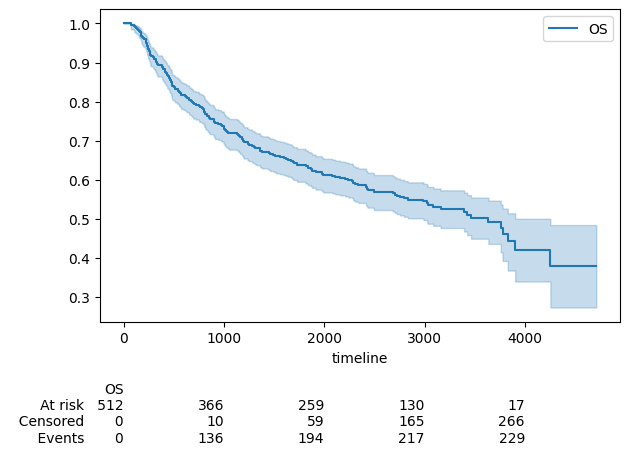

In [77]:
kmf_os = KaplanMeierFitter().fit(data["OS"], data["Death"], label="OS")
kmf_os.plot_survival_function(at_risk_counts=True)
plt.tight_layout()
kmf_os.median_survival_time_

inf

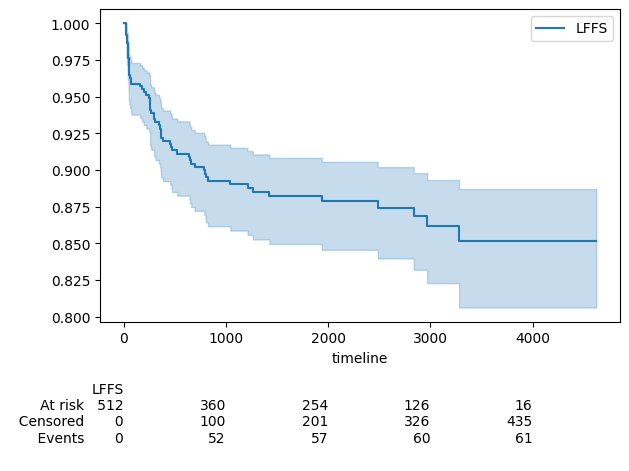

In [78]:
kmf_lffs = KaplanMeierFitter().fit(data["LFFS"], data["LF"], label="LFFS")
kmf_lffs.plot_survival_function(at_risk_counts=True)
plt.tight_layout()
kmf_lffs.median_survival_time_

inf

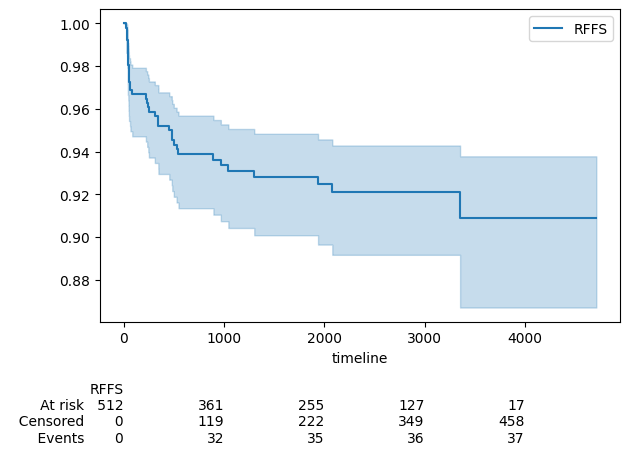

In [79]:
kmf_rffs = KaplanMeierFitter().fit(data["RFFS"], data["RF"], label="RFFS")
kmf_rffs.plot_survival_function(at_risk_counts=True)
plt.tight_layout()
kmf_rffs.median_survival_time_

inf

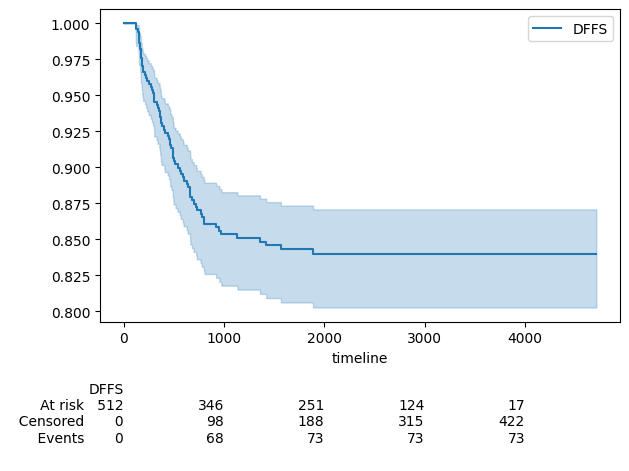

In [80]:
kmf_dffs = KaplanMeierFitter().fit(data["DFFS"], data["DF"], label="DFFS")
kmf_dffs.plot_survival_function(at_risk_counts=True)
plt.tight_layout()
kmf_dffs.median_survival_time_

/tmp/ipykernel_1595616/111668748.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration[duration>3660]=3660
/tmp/ipykernel_1595616/111668748.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration[duration>3660]=3660


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         123.88 <0.005     93.17

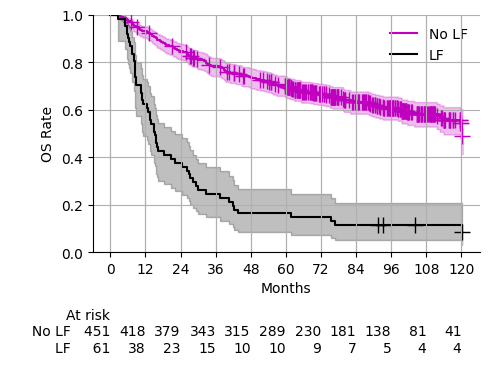

In [81]:
duration = data[['OS']]
duration[duration>3660]=3660
duration /= (365/12)
event = data[['Death']]


high_risk_ind = np.argwhere(data['LF'].values >= 1)
low_risk_ind = np.argwhere(data['LF'].values < 1)

cum_event = event
cum_duration = duration

durations = cum_duration.to_numpy()
events= cum_event.to_numpy()

plt.figure(figsize=(5,4))
ax = plt.subplot(111)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

kmf_1 = lifelines.KaplanMeierFitter()
ax = kmf_1.fit(durations[low_risk_ind], event_observed=events[low_risk_ind], label="No LF").plot_survival_function(show_censors=True,ci_show=True, ax=ax,color='m')

kmf_2 = lifelines.KaplanMeierFitter()
ax = kmf_2.fit(durations[high_risk_ind], event_observed=events[high_risk_ind], label="LF").plot_survival_function(show_censors=True,ci_show=True, ax=ax,color='k') #, linestyle='dashed'
plt.xticks(np.linspace(0,120,11))
plt.grid()
plt.xlabel('Months')
plt.ylabel('OS Rate')
plt.legend(frameon=False)

add_at_risk_counts(kmf_1, kmf_2, ax=ax, rows_to_show=['At risk'])
plt.tight_layout()
plt.ylim([0, 1])
plt.grid()
results = logrank_test(durations[high_risk_ind], durations[low_risk_ind], events[high_risk_ind], events[low_risk_ind], alpha=.95)

results.print_summary()
plt.savefig('OS_LF {}.png'.format(results._p_value), dpi=300)

In [82]:
results._p_value

array([8.96427134e-29])

/tmp/ipykernel_1595616/145925304.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration[duration>3660]=3660
/tmp/ipykernel_1595616/145925304.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration[duration>3660]=3660


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          67.91 <0.005     52.37

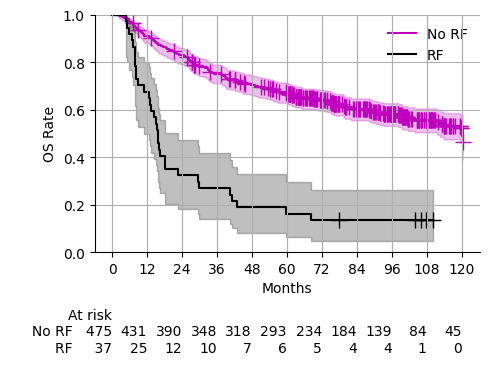

In [83]:
duration = data[['OS']]
duration[duration>3660]=3660
duration /= (365/12)
event = data[['Death']]

high_risk_ind = np.argwhere(data['RF'].values >= 1)
low_risk_ind = np.argwhere(data['RF'].values < 1)

cum_event = event
cum_duration = duration

durations = cum_duration.to_numpy()
events= cum_event.to_numpy()

plt.figure(figsize=(5,4))
ax = plt.subplot(111)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

kmf_1 = lifelines.KaplanMeierFitter()
ax = kmf_1.fit(durations[low_risk_ind], event_observed=events[low_risk_ind], label="No RF").plot_survival_function(show_censors=True,ci_show=True, ax=ax,color='m')

kmf_2 = lifelines.KaplanMeierFitter()
ax = kmf_2.fit(durations[high_risk_ind], event_observed=events[high_risk_ind], label="RF").plot_survival_function(show_censors=True,ci_show=True, ax=ax,color='k') #, linestyle='dashed'
plt.xticks(np.linspace(0,120,11))
plt.grid()
plt.xlabel('Months')
plt.ylabel('OS Rate')
plt.legend(frameon=False)

add_at_risk_counts(kmf_1, kmf_2, ax=ax, rows_to_show=['At risk'])
plt.tight_layout()
plt.ylim([0, 1])
# plt.savefig('ViT_OS.png', dpi=300)
plt.grid()
results = logrank_test(durations[high_risk_ind], durations[low_risk_ind], events[high_risk_ind], events[low_risk_ind], alpha=.95)

results.print_summary()
plt.savefig('OS_RF_{}.png'.format(results._p_value), dpi=300)

/tmp/ipykernel_1595616/4011503530.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration[duration>3660]=3660
/tmp/ipykernel_1595616/4011503530.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration[duration>3660]=3660


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         131.01 <0.005     98.36

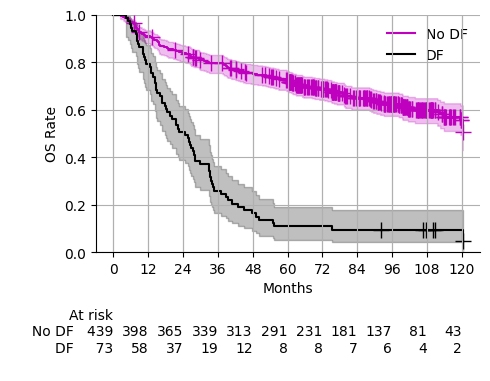

In [84]:
duration = data[['OS']]
duration[duration>3660]=3660
duration /= (365/12)
event = data[['Death']]

high_risk_ind = np.argwhere(data['DF'].values >= 1)
low_risk_ind = np.argwhere(data['DF'].values < 1)

cum_event = event
cum_duration = duration

durations = cum_duration.to_numpy()
events= cum_event.to_numpy()

plt.figure(figsize=(5,4))
ax = plt.subplot(111)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

kmf_1 = lifelines.KaplanMeierFitter()
ax = kmf_1.fit(durations[low_risk_ind], event_observed=events[low_risk_ind], label="No DF").plot_survival_function(show_censors=True,ci_show=True, ax=ax,color='m')

kmf_2 = lifelines.KaplanMeierFitter()
ax = kmf_2.fit(durations[high_risk_ind], event_observed=events[high_risk_ind], label="DF").plot_survival_function(show_censors=True,ci_show=True, ax=ax,color='k') #, linestyle='dashed'
plt.xticks(np.linspace(0,120,11))
plt.grid()
plt.xlabel('Months')
plt.ylabel('OS Rate')
plt.legend(frameon=False)

add_at_risk_counts(kmf_1, kmf_2, ax=ax, rows_to_show=['At risk'])
plt.tight_layout()
plt.ylim([0, 1])
# plt.savefig('ViT_OS.png', dpi=300)
plt.grid()
results = logrank_test(durations[high_risk_ind], durations[low_risk_ind], events[high_risk_ind], events[low_risk_ind], alpha=.95)

results.print_summary()
plt.savefig('OS_DF_{}.png'.format(results._p_value), dpi=300)

/tmp/ipykernel_1595616/3921278998.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration[duration>3660]=3660
/tmp/ipykernel_1595616/3921278998.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration[duration>3660]=3660


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          82.50 <0.005     63.04

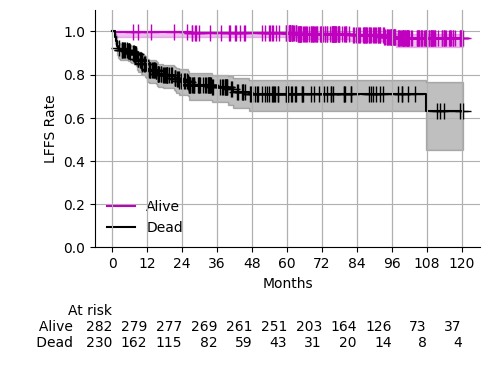

In [85]:
duration = data[['LFFS']]
duration[duration>3660]=3660
duration /= (365/12)
event = data[['LF']]

high_risk_ind = np.argwhere(data['Death'].values >= 1 )
low_risk_ind = np.argwhere(data['Death'].values < 1)

cum_event = event
cum_duration = duration

durations = cum_duration.to_numpy()
events= cum_event.to_numpy()

plt.figure(figsize=(5,4))
ax = plt.subplot(111)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

kmf_1 = lifelines.KaplanMeierFitter()
ax = kmf_1.fit(durations[low_risk_ind], event_observed=events[low_risk_ind], label="Alive").plot_survival_function(show_censors=True,ci_show=True, ax=ax,color='m')

kmf_2 = lifelines.KaplanMeierFitter()
ax = kmf_2.fit(durations[high_risk_ind], event_observed=events[high_risk_ind], label="Dead").plot_survival_function(show_censors=True,ci_show=True, ax=ax,color='k') #, linestyle='dashed'
plt.xticks(np.linspace(0,120,11))
plt.grid()
plt.xlabel('Months')
plt.ylabel('LFFS Rate')
plt.legend(frameon=False)

add_at_risk_counts(kmf_1, kmf_2, ax=ax, rows_to_show=['At risk'])
plt.tight_layout()
plt.ylim([0, 1.1])
# plt.savefig('ViT_OS.png', dpi=300)
plt.grid()
results = logrank_test(durations[high_risk_ind], durations[low_risk_ind], events[high_risk_ind], events[low_risk_ind], alpha=.95)

results.print_summary()

plt.savefig('LF_OS_{}.png'.format(results._p_value), dpi=300)

/tmp/ipykernel_1595616/903158440.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration[duration>3660]=3660
/tmp/ipykernel_1595616/903158440.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration[duration>3660]=3660


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         113.00 <0.005     85.26

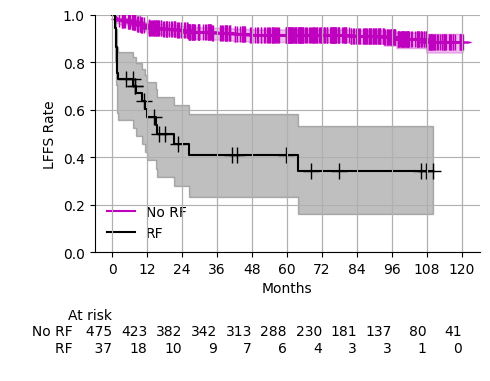

In [86]:
duration = data[['LFFS']]
duration[duration>3660]=3660
duration /= (365/12)
event = data[['LF']]

high_risk_ind = np.argwhere(data['RF'].values >= 1)
low_risk_ind = np.argwhere(data['RF'].values < 1)

cum_event = event
cum_duration = duration

durations = cum_duration.to_numpy()
events= cum_event.to_numpy()

plt.figure(figsize=(5,4))
ax = plt.subplot(111)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

kmf_1 = lifelines.KaplanMeierFitter()
ax = kmf_1.fit(durations[low_risk_ind], event_observed=events[low_risk_ind], label="No RF").plot_survival_function(show_censors=True,ci_show=True, ax=ax,color='m')

kmf_2 = lifelines.KaplanMeierFitter()
ax = kmf_2.fit(durations[high_risk_ind], event_observed=events[high_risk_ind], label="RF").plot_survival_function(show_censors=True,ci_show=True, ax=ax,color='k') #, linestyle='dashed'
plt.xticks(np.linspace(0,120,11))
plt.grid()
plt.xlabel('Months')
plt.ylabel('LFFS Rate')
plt.legend(frameon=False)

add_at_risk_counts(kmf_1, kmf_2, ax=ax, rows_to_show=['At risk'])
plt.tight_layout()
plt.ylim([0, 1])
# plt.savefig('ViT_OS.png', dpi=300)
plt.grid()
results = logrank_test(durations[high_risk_ind], durations[low_risk_ind], events[high_risk_ind], events[low_risk_ind], alpha=.95)

results.print_summary()
plt.savefig('LF_RS_{}.png'.format(results._p_value), dpi=300)

C-index is 0.7733975093590038


/tmp/ipykernel_1595616/2959389994.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration[duration>3660]=3660
/tmp/ipykernel_1595616/2959389994.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration[duration>3660]=3660


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           2.53 0.11      3.16

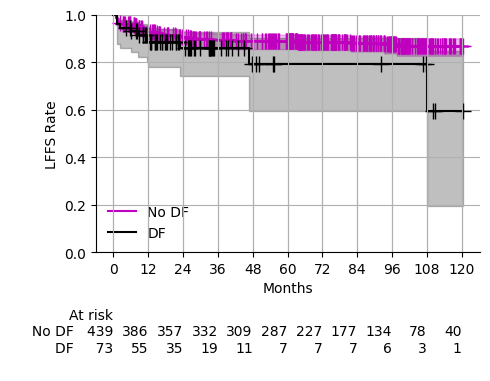

In [87]:
duration = data[['LFFS']]
duration[duration>3660]=3660
duration /= (365/12)
event = data[['LF']]

score = concordance_index(
                event_times=duration, 
                predicted_scores = -data['OS_risk'], 
                event_observed= event,
            )
print('C-index is', score)

high_risk_ind = np.argwhere(data['DF'].values >= 1)
low_risk_ind = np.argwhere(data['DF'].values < 1)

cum_event = event
cum_duration = duration

durations = cum_duration.to_numpy()
events= cum_event.to_numpy()

plt.figure(figsize=(5,4))
ax = plt.subplot(111)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

kmf_1 = lifelines.KaplanMeierFitter()
ax = kmf_1.fit(durations[low_risk_ind], event_observed=events[low_risk_ind], label="No DF").plot_survival_function(show_censors=True,ci_show=True, ax=ax,color='m')

kmf_2 = lifelines.KaplanMeierFitter()
ax = kmf_2.fit(durations[high_risk_ind], event_observed=events[high_risk_ind], label="DF").plot_survival_function(show_censors=True,ci_show=True, ax=ax,color='k') #, linestyle='dashed'
plt.xticks(np.linspace(0,120,11))
plt.grid()
plt.xlabel('Months')
plt.ylabel('LFFS Rate')
plt.legend(frameon=False)

add_at_risk_counts(kmf_1, kmf_2, ax=ax, rows_to_show=['At risk'])
plt.tight_layout()
plt.ylim([0, 1])
# plt.savefig('ViT_OS.png', dpi=300)
plt.grid()
results = logrank_test(durations[high_risk_ind], durations[low_risk_ind], events[high_risk_ind], events[low_risk_ind], alpha=.95)

results.print_summary()
plt.savefig('LF_DF_{}.png'.format(results._p_value), dpi=300)

/tmp/ipykernel_1595616/389886364.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration[duration>3660]=3660
/tmp/ipykernel_1595616/389886364.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration[duration>3660]=3660


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          39.96 <0.005     31.85

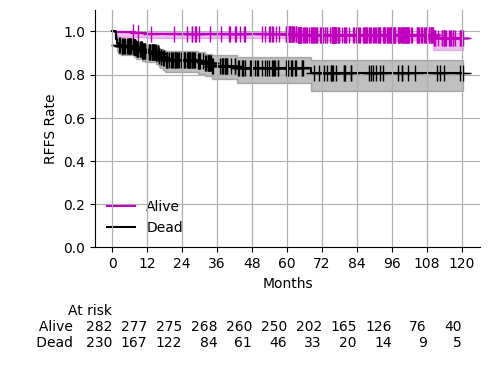

In [88]:
duration = data[['RFFS']]
duration[duration>3660]=3660
duration /= (365/12)
event = data[['RF']]

high_risk_ind = np.argwhere(data['Death'].values >= 1)
low_risk_ind = np.argwhere(data['Death'].values < 1)

cum_event = event
cum_duration = duration

durations = cum_duration.to_numpy()
events= cum_event.to_numpy()

plt.figure(figsize=(5,4))
ax = plt.subplot(111)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

kmf_1 = lifelines.KaplanMeierFitter()
ax = kmf_1.fit(durations[low_risk_ind], event_observed=events[low_risk_ind], label="Alive").plot_survival_function(show_censors=True,ci_show=True, ax=ax,color='m')

kmf_2 = lifelines.KaplanMeierFitter()
ax = kmf_2.fit(durations[high_risk_ind], event_observed=events[high_risk_ind], label="Dead").plot_survival_function(show_censors=True,ci_show=True, ax=ax,color='k') #, linestyle='dashed'
plt.xticks(np.linspace(0,120,11))
plt.grid()
plt.xlabel('Months')
plt.ylabel('RFFS Rate')
plt.legend(frameon=False)

add_at_risk_counts(kmf_1, kmf_2, ax=ax, rows_to_show=['At risk'])
plt.tight_layout()
plt.ylim([0, 1.1])
# plt.savefig('ViT_OS.png', dpi=300)
plt.grid()
results = logrank_test(durations[high_risk_ind], durations[low_risk_ind], events[high_risk_ind], events[low_risk_ind], alpha=.95)

results.print_summary()
plt.savefig('RF_OS_{}.png'.format(results._p_value), dpi=300)

/tmp/ipykernel_1595616/3354169089.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration[duration>3660]=3660
/tmp/ipykernel_1595616/3354169089.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration[duration>3660]=3660


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          99.32 <0.005     75.30

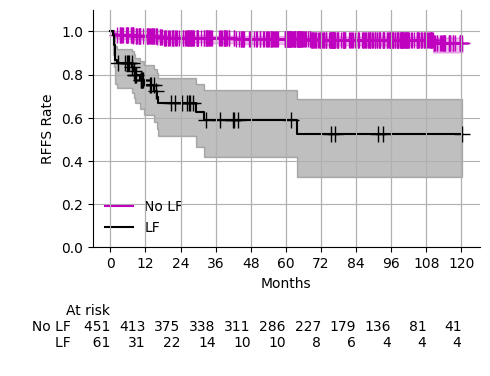

In [89]:
duration = data[['RFFS']]
duration[duration>3660]=3660
duration /= (365/12)
event = data[['RF']]

high_risk_ind = np.argwhere(data['LF'].values >= 1)
low_risk_ind = np.argwhere(data['LF'].values < 1)

cum_event = event
cum_duration = duration

durations = cum_duration.to_numpy()
events= cum_event.to_numpy()

plt.figure(figsize=(5,4))
ax = plt.subplot(111)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

kmf_1 = lifelines.KaplanMeierFitter()
ax = kmf_1.fit(durations[low_risk_ind], event_observed=events[low_risk_ind], label="No LF").plot_survival_function(show_censors=True,ci_show=True, ax=ax,color='m')

kmf_2 = lifelines.KaplanMeierFitter()
ax = kmf_2.fit(durations[high_risk_ind], event_observed=events[high_risk_ind], label="LF").plot_survival_function(show_censors=True,ci_show=True, ax=ax,color='k') #, linestyle='dashed'
plt.xticks(np.linspace(0,120,11))
plt.grid()
plt.xlabel('Months')
plt.ylabel('RFFS Rate')
plt.legend(frameon=False)

add_at_risk_counts(kmf_1, kmf_2, ax=ax, rows_to_show=['At risk'])
plt.tight_layout()
plt.ylim([0, 1.1])
# plt.savefig('ViT_OS.png', dpi=300)
plt.grid()
results = logrank_test(durations[high_risk_ind], durations[low_risk_ind], events[high_risk_ind], events[low_risk_ind], alpha=.95)

results.print_summary()
plt.savefig('RF_LF_{}.png'.format(results._p_value), dpi=300)

/tmp/ipykernel_1595616/634783753.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration[duration>3660]=3660
/tmp/ipykernel_1595616/634783753.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration[duration>3660]=3660


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          12.01 <0.005     10.89

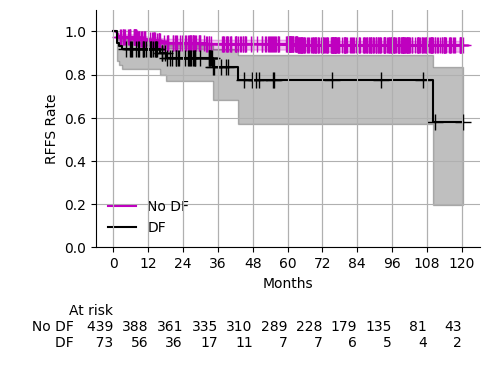

In [90]:
duration = data[['RFFS']]
duration[duration>3660]=3660
duration /= (365/12)
event = data[['RF']]

high_risk_ind = np.argwhere(data['DF'].values >= 1)
low_risk_ind = np.argwhere(data['DF'].values < 1)

cum_event = event
cum_duration = duration

durations = cum_duration.to_numpy()
events= cum_event.to_numpy()

plt.figure(figsize=(5,4))
ax = plt.subplot(111)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

kmf_1 = lifelines.KaplanMeierFitter()
ax = kmf_1.fit(durations[low_risk_ind], event_observed=events[low_risk_ind], label="No DF").plot_survival_function(show_censors=True,ci_show=True, ax=ax,color='m')

kmf_2 = lifelines.KaplanMeierFitter()
ax = kmf_2.fit(durations[high_risk_ind], event_observed=events[high_risk_ind], label="DF").plot_survival_function(show_censors=True,ci_show=True, ax=ax,color='k') #, linestyle='dashed'
plt.xticks(np.linspace(0,120,11))
plt.grid()
plt.xlabel('Months')
plt.ylabel('RFFS Rate')
plt.legend(frameon=False)

add_at_risk_counts(kmf_1, kmf_2, ax=ax, rows_to_show=['At risk'])
plt.tight_layout()
plt.ylim([0, 1.1])
# plt.savefig('ViT_OS.png', dpi=300)
plt.grid()
results = logrank_test(durations[high_risk_ind], durations[low_risk_ind], events[high_risk_ind], events[low_risk_ind], alpha=.95)

results.print_summary()
plt.savefig('RF_DF_{}.png'.format(results._p_value), dpi=300)

/tmp/ipykernel_1595616/2910538210.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration[duration>3660]=3660
/tmp/ipykernel_1595616/2910538210.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration[duration>3660]=3660


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         109.04 <0.005     82.38

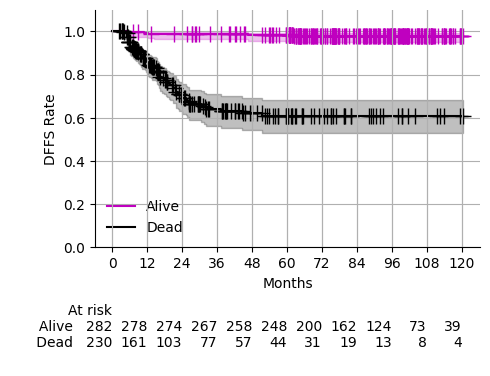

In [91]:
duration = data[['DFFS']]
duration[duration>3660]=3660
duration /= (365/12)
event = data[['DF']]

high_risk_ind = np.argwhere(data['Death'].values >= 1)
low_risk_ind = np.argwhere(data['Death'].values < 1)

cum_event = event
cum_duration = duration

durations = cum_duration.to_numpy()
events= cum_event.to_numpy()

plt.figure(figsize=(5,4))
ax = plt.subplot(111)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

kmf_1 = lifelines.KaplanMeierFitter()
ax = kmf_1.fit(durations[low_risk_ind], event_observed=events[low_risk_ind], label="Alive").plot_survival_function(show_censors=True,ci_show=True, ax=ax,color='m')

kmf_2 = lifelines.KaplanMeierFitter()
ax = kmf_2.fit(durations[high_risk_ind], event_observed=events[high_risk_ind], label="Dead").plot_survival_function(show_censors=True,ci_show=True, ax=ax,color='k') #, linestyle='dashed'
plt.xticks(np.linspace(0,120,11))
plt.grid()
plt.xlabel('Months')
plt.ylabel('DFFS Rate')
plt.legend(frameon=False)

add_at_risk_counts(kmf_1, kmf_2, ax=ax, rows_to_show=['At risk'])
plt.tight_layout()
plt.ylim([0, 1.1])
# plt.savefig('ViT_OS.png', dpi=300)
plt.grid()
results = logrank_test(durations[high_risk_ind], durations[low_risk_ind], events[high_risk_ind], events[low_risk_ind], alpha=.95)

results.print_summary()
plt.savefig('DF_OS_{}.png'.format(results._p_value), dpi=300)

/tmp/ipykernel_1595616/872581824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration[duration>3660]=3660
/tmp/ipykernel_1595616/872581824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration[duration>3660]=3660


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           5.14 0.02      5.42

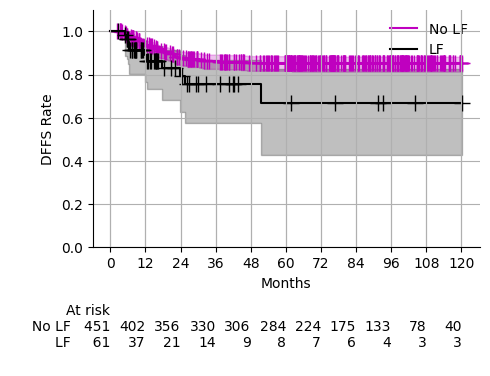

In [92]:
duration = data[['DFFS']]
duration[duration>3660]=3660
duration /= (365/12)
event = data[['DF']]

high_risk_ind = np.argwhere(data['LF'].values >= 1)
low_risk_ind = np.argwhere(data['LF'].values < 1)

cum_event = event
cum_duration = duration

durations = cum_duration.to_numpy()
events= cum_event.to_numpy()

plt.figure(figsize=(5,4))
ax = plt.subplot(111)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

kmf_1 = lifelines.KaplanMeierFitter()
ax = kmf_1.fit(durations[low_risk_ind], event_observed=events[low_risk_ind], label="No LF").plot_survival_function(show_censors=True,ci_show=True, ax=ax,color='m')

kmf_2 = lifelines.KaplanMeierFitter()
ax = kmf_2.fit(durations[high_risk_ind], event_observed=events[high_risk_ind], label="LF").plot_survival_function(show_censors=True,ci_show=True, ax=ax,color='k') #, linestyle='dashed'
plt.xticks(np.linspace(0,120,11))
plt.grid()
plt.xlabel('Months')
plt.ylabel('DFFS Rate')
plt.legend(frameon=False)

add_at_risk_counts(kmf_1, kmf_2, ax=ax, rows_to_show=['At risk'])
plt.tight_layout()
plt.ylim([0, 1.1])
# plt.savefig('ViT_OS.png', dpi=300)
plt.grid()
results = logrank_test(durations[high_risk_ind], durations[low_risk_ind], events[high_risk_ind], events[low_risk_ind], alpha=.95)

results.print_summary()
plt.savefig('DF_LF_{}.png'.format(results._p_value), dpi=300)

/tmp/ipykernel_1595616/1519081058.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration[duration>3660]=3660
/tmp/ipykernel_1595616/1519081058.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration[duration>3660]=3660


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          19.83 <0.005     16.85

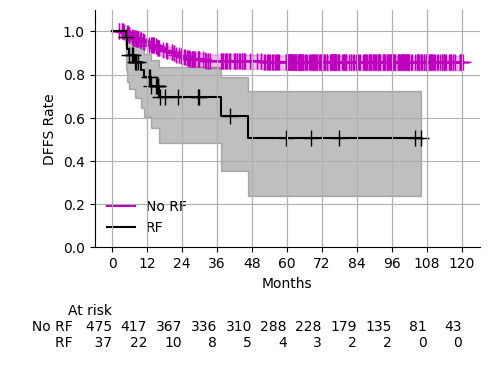

In [93]:
duration = data[['DFFS']]
duration[duration>3660]=3660
duration /= (365/12)
event = data[['DF']]

high_risk_ind = np.argwhere(data['RF'].values >= 1)
low_risk_ind = np.argwhere(data['RF'].values < 1)

cum_event = event
cum_duration = duration

durations = cum_duration.to_numpy()
events= cum_event.to_numpy()

plt.figure(figsize=(5,4))
ax = plt.subplot(111)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

kmf_1 = lifelines.KaplanMeierFitter()
ax = kmf_1.fit(durations[low_risk_ind], event_observed=events[low_risk_ind], label="No RF").plot_survival_function(show_censors=True,ci_show=True, ax=ax,color='m')

kmf_2 = lifelines.KaplanMeierFitter()
ax = kmf_2.fit(durations[high_risk_ind], event_observed=events[high_risk_ind], label="RF").plot_survival_function(show_censors=True,ci_show=True, ax=ax,color='k') #, linestyle='dashed'
plt.xticks(np.linspace(0,120,11))
plt.grid()
plt.xlabel('Months')
plt.ylabel('DFFS Rate')
plt.legend(frameon=False)

add_at_risk_counts(kmf_1, kmf_2, ax=ax, rows_to_show=['At risk'])
plt.tight_layout()
plt.ylim([0, 1.1])
# plt.savefig('ViT_OS.png', dpi=300)
plt.grid()
results = logrank_test(durations[high_risk_ind], durations[low_risk_ind], events[high_risk_ind], events[low_risk_ind], alpha=.95)

results.print_summary()
plt.savefig('DF_RF_{}.png'.format(results._p_value), dpi=300)

In [94]:
from scipy.stats import fisher_exact

In [96]:
data[['OS','LFFS','RFFS','DFFS']].corr()

,OS,LFFS,RFFS,DFFS
OS,1.000000,0.979710,0.981620,0.964033
LFFS,0.979710,1.000000,0.964181,0.945746
RFFS,0.981620,0.964181,1.000000,0.958311
DFFS,0.964033,0.945746,0.958311,1.000000


In [104]:
temp_data = data[['OS','LFFS','RFFS','DFFS']]
temp_data = temp_data[data['Death'].values >= 1]
temp_data.corr()

,OS,LFFS,RFFS,DFFS
OS,1.000000,0.984162,0.991836,0.959747
LFFS,0.984162,1.000000,0.979739,0.951790
RFFS,0.991836,0.979739,1.000000,0.950632
DFFS,0.959747,0.951790,0.950632,1.000000


In [106]:
temp_data = data[['OS','LFFS','RFFS','DFFS']]
temp_data = temp_data[data['Death'].values < 1]
temp_data.corr()

,OS,LFFS,RFFS,DFFS
OS,1.000000,0.940447,0.942507,0.908951
LFFS,0.940447,1.000000,0.891258,0.850457
RFFS,0.942507,0.891258,1.000000,0.899691
DFFS,0.908951,0.850457,0.899691,1.000000


In [107]:
temp_data = data[['OS','LFFS','RFFS','DFFS']]
temp_data = temp_data[data['LF'].values < 1]
temp_data.corr()

,OS,LFFS,RFFS,DFFS
OS,1.000000,1.000000,0.978897,0.962136
LFFS,1.000000,1.000000,0.978897,0.962136
RFFS,0.978897,0.978897,1.000000,0.957232
DFFS,0.962136,0.962136,0.957232,1.000000


In [108]:
temp_data = data[['OS','LFFS','RFFS','DFFS']]
temp_data = temp_data[data['LF'].values >= 1]
temp_data.corr()

,OS,LFFS,RFFS,DFFS
OS,1.000000,0.845273,0.984103,0.944256
LFFS,0.845273,1.000000,0.836683,0.740353
RFFS,0.984103,0.836683,1.000000,0.921803
DFFS,0.944256,0.740353,0.921803,1.000000


In [110]:
temp_data = data[['OS','LFFS','RFFS','DFFS']]
temp_data = temp_data[data['RF'].values >= 1]
temp_data.corr()


,OS,LFFS,RFFS,DFFS
OS,1.000000,0.967597,0.634385,0.789503
LFFS,0.967597,1.000000,0.593280,0.713571
RFFS,0.634385,0.593280,1.000000,0.540980
DFFS,0.789503,0.713571,0.540980,1.000000


In [112]:
temp_data = data[['OS','LFFS','RFFS','DFFS']]
temp_data = temp_data[data['RF'].values < 1]
temp_data.corr()

,OS,LFFS,RFFS,DFFS
OS,1.000000,0.97902,1.000000,0.969859
LFFS,0.979020,1.00000,0.979020,0.951780
RFFS,1.000000,0.97902,1.000000,0.969859
DFFS,0.969859,0.95178,0.969859,1.000000


In [113]:
temp_data = data[['OS','LFFS','RFFS','DFFS']]
temp_data = temp_data[data['DF'].values >= 1]
temp_data.corr()


,OS,LFFS,RFFS,DFFS
OS,1.000000,0.988867,0.906371,0.584708
LFFS,0.988867,1.000000,0.890236,0.576030
RFFS,0.906371,0.890236,1.000000,0.666017
DFFS,0.584708,0.576030,0.666017,1.000000


In [114]:
temp_data = data[['OS','LFFS','RFFS','DFFS']]
temp_data = temp_data[data['DF'].values < 1]
temp_data.corr()

,OS,LFFS,RFFS,DFFS
OS,1.000000,0.976077,0.985971,1.000000
LFFS,0.976077,1.000000,0.965709,0.976077
RFFS,0.985971,0.965709,1.000000,0.985971
DFFS,1.000000,0.976077,0.985971,1.000000
